In [1]:
import os
import sys
from pathlib import Path
sys.path.append('..')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%load_ext autoreload
%autoreload 2

from src.constants import *
from src.utils import composite_func, extract_digit, load_all_csv
from src.preprocess import (
    drop_cols,
    disolve_address_col,
    disolve_location_cols,
    int_age_col,
    num_story_col,
    int_floor_col,
    fee2int_col,
    area2float_col,
    preprocess
)

In [2]:
df = load_all_csv(data_dir / 'raw')
df.head()

,Unnamed: 0,name,address,location0,location1,location2,age,height,floor,rent,admin,deposit,gratuity,floor_plan,area,architecture,district
0,0,京急空港線 大鳥居駅 5階建 築9年,東京都大田区東糀谷２,京急空港線/大鳥居駅 歩7分,京急空港線/糀谷駅 歩13分,京急空港線/穴守稲荷駅 歩14分,築9年,5階建,2階,9万円,4000円,-,9万円,1K,27.74m2,鉄筋系,大田区
1,1,京急空港線 大鳥居駅 5階建 築9年,東京都大田区東糀谷２,京急空港線/大鳥居駅 歩7分,京急空港線/糀谷駅 歩13分,京急空港線/穴守稲荷駅 歩14分,築9年,5階建,4階,9.2万円,4000円,-,9.2万円,1K,27.74m2,鉄筋系,大田区
2,2,京急空港線 大鳥居駅 5階建 築9年,東京都大田区東糀谷２,京急空港線/大鳥居駅 歩7分,京急空港線/糀谷駅 歩13分,京急空港線/穴守稲荷駅 歩14分,築9年,5階建,4階,9.2万円,4000円,-,9.2万円,1K,27.74m2,鉄筋系,大田区
3,3,京急空港線 大鳥居駅 5階建 築9年,東京都大田区東糀谷２,京急空港線/大鳥居駅 歩7分,京急空港線/糀谷駅 歩13分,京急空港線/穴守稲荷駅 歩14分,築9年,5階建,4階,12.3万円,6000円,-,12.3万円,1LDK,41.05m2,鉄筋系,大田区
4,4,東急大井町線 旗の台駅 5階建 築11年,東京都大田区北馬込１,東急大井町線/旗の台駅 歩7分,東急池上線/長原駅 歩5分,東急大井町線/荏原町駅 歩11分,築11年,5階建,4階,10.4万円,6000円,-,10.4万円,1K,27.73m2,鉄筋系,大田区


In [3]:
# number of rooms in tokyo
len(df)

509134

In [4]:
drop_cols(df.copy()).head()

,address,location0,location1,location2,age,height,floor,rent,admin,deposit,gratuity,floor_plan,area,architecture,district
0,東京都大田区東糀谷２,京急空港線/大鳥居駅 歩7分,京急空港線/糀谷駅 歩13分,京急空港線/穴守稲荷駅 歩14分,築9年,5階建,2階,9万円,4000円,-,9万円,1K,27.74m2,鉄筋系,大田区
1,東京都大田区東糀谷２,京急空港線/大鳥居駅 歩7分,京急空港線/糀谷駅 歩13分,京急空港線/穴守稲荷駅 歩14分,築9年,5階建,4階,9.2万円,4000円,-,9.2万円,1K,27.74m2,鉄筋系,大田区
2,東京都大田区東糀谷２,京急空港線/大鳥居駅 歩7分,京急空港線/糀谷駅 歩13分,京急空港線/穴守稲荷駅 歩14分,築9年,5階建,4階,9.2万円,4000円,-,9.2万円,1K,27.74m2,鉄筋系,大田区
3,東京都大田区東糀谷２,京急空港線/大鳥居駅 歩7分,京急空港線/糀谷駅 歩13分,京急空港線/穴守稲荷駅 歩14分,築9年,5階建,4階,12.3万円,6000円,-,12.3万円,1LDK,41.05m2,鉄筋系,大田区
4,東京都大田区北馬込１,東急大井町線/旗の台駅 歩7分,東急池上線/長原駅 歩5分,東急大井町線/荏原町駅 歩11分,築11年,5階建,4階,10.4万円,6000円,-,10.4万円,1K,27.73m2,鉄筋系,大田区


In [5]:
%%time
df_loc = disolve_location_cols(df.copy())

CPU times: user 5.77 s, sys: 353 ms, total: 6.12 s
Wall time: 6.22 s


In [6]:
print(df_loc[['walk_time_0', 'walk_time_1', 'walk_time_2']].max())
print(df_loc[['walk_time_0', 'walk_time_1', 'walk_time_2']].idxmax())

walk_time_0    114
walk_time_1    131
walk_time_2    223
dtype: int64
walk_time_0    475284
walk_time_1    470454
walk_time_2    134517
dtype: int64


In [7]:
df_loc.iloc[470454]

Unnamed: 0                   3330
name            小田急線 町田駅 2階建 築23年
address                 東京都町田市常盤町
age                          築23年
height                        2階建
floor                          2階
rent                        5.7万円
admin                       3000円
deposit                         -
gratuity                        -
floor_plan                    3DK
area                      62.92m2
architecture                  鉄骨系
district                      町田市
station_0                小田急線/町田駅
walk_time_0                    81
bus_time_0                      0
station_1           小田急多摩線/小田急永山駅
walk_time_1                   131
bus_time_1                      0
station_2            小田急多摩線/はるひ野駅
walk_time_2                   132
bus_time_2                      0
Name: 470454, dtype: object

## Walk time outlier
Above apartment has very long walk_times, this is caused by mistake for choosing the nearest station.
Suumo algorithm probably searches the nearest station from the apartment **in the prefecture the apartment is placed**.
However, there are nearer stations if across the prefecture.
In fact, the nearest station from this apartment placed in Tokyo is Yabe station placed in Kanagawa.

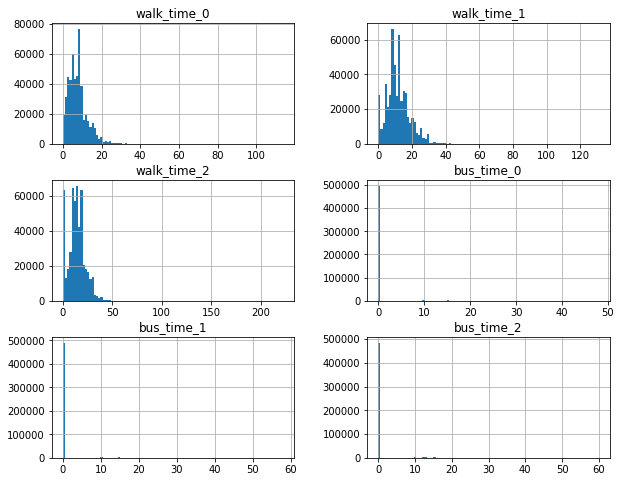

In [8]:
df_loc[['walk_time_0', 'walk_time_1', 'walk_time_2', 'bus_time_0', 'bus_time_1', 'bus_time_2']].hist(figsize=(10, 8), bins=100)
plt.show()

In [9]:
ages = int_age_col(df.copy())['age']

<AxesSubplot:>

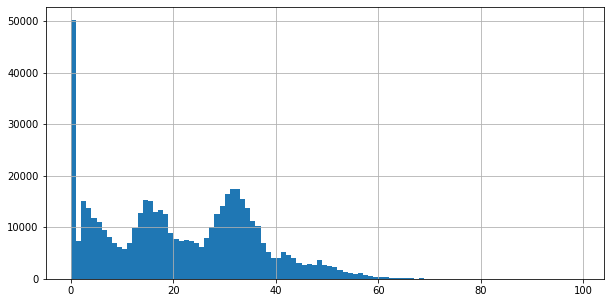

In [10]:
ages.hist(bins=max(ages), figsize=(10, 5))

## Why are there four peaks ?
### First head
It's just new apartment.

### Second head in 2018
The rush demand by the cunsumption tax raising 8% to 10%.

### Third head in 2006
In 2007, the amendment of the building standards law.

### Fourth head in 1990.
The bubble exploded.
The rush demand by the cunsumption tax raising 3% to 5% and the demand by recovering the Hanshin earthquake damages.

CPU times: user 1.66 s, sys: 96.4 ms, total: 1.76 s
Wall time: 1.76 s


<AxesSubplot:>

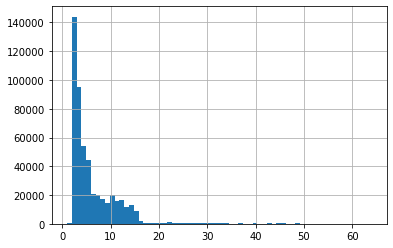

In [11]:
%%time
stories = num_story_col(df.copy())['stories']
stories.hist(bins=max(stories))

<AxesSubplot:>

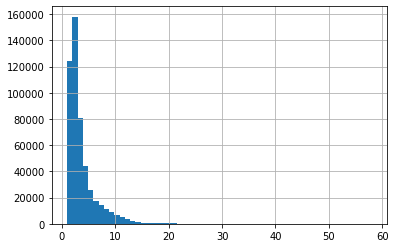

In [12]:
floors = int_floor_col(df.copy())['floor']
floors.hist(bins=max(floors))

In [13]:
fees = fee2int_col(df.copy())[['rent', 'admin', 'deposit', 'gratuity']]

       Unnamed: 0     name      address        location0        location1  \
175214       5970  ラレーブ羽根木  東京都世田谷区羽根木１  京王井の頭線/東松原駅 歩8分  京王井の頭線/新代田駅 歩8分   
256662       5901  ラレーブ羽根木  東京都世田谷区羽根木１  京王井の頭線/東松原駅 歩8分  京王井の頭線/新代田駅 歩8分   

            location2   age height floor   rent   admin  deposit gratuity  \
175214  京王線/代田橋駅 歩12分  築30年    3階建  1-3階  145万円  90000円  21025万円        -   
256662  京王線/代田橋駅 歩12分  築30年    3階建  1-3階  145万円  90000円  21025万円        -   

       floor_plan      area architecture district  
175214       3LDK  501.42m2          鉄筋系     世田谷区  
256662       3LDK  501.42m2          鉄筋系    横浜市旭区  


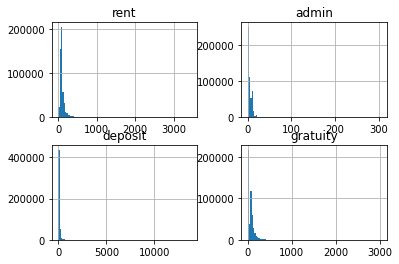

In [14]:
print(df[fees['deposit'] > 100000])
fees = fees[fees['deposit']<100000]
fees.hist(bins=100)
plt.show()

In [15]:
%%time
df_ = preprocess(df.copy())

CPU times: user 19.4 s, sys: 513 ms, total: 20 s
Wall time: 20 s


In [16]:
df_

,address,age,floor,rent,admin,deposit,gratuity,floor_plan,area,architecture,...,walk_time_0,bus_time_0,station_1,walk_time_1,bus_time_1,station_2,walk_time_2,bus_time_2,stories,maisonette
0,東糀谷２,築9年,2,90,4,1,90,1K,27.74,鉄筋系,...,7,0,京急空港線/糀谷駅,13,0,京急空港線/穴守稲荷駅,14,0,5,0
1,東糀谷２,築9年,4,90,4,1,90,1K,27.74,鉄筋系,...,7,0,京急空港線/糀谷駅,13,0,京急空港線/穴守稲荷駅,14,0,5,0
2,東糀谷２,築9年,4,90,4,1,90,1K,27.74,鉄筋系,...,7,0,京急空港線/糀谷駅,13,0,京急空港線/穴守稲荷駅,14,0,5,0
3,東糀谷２,築9年,4,120,6,1,120,1LDK,41.05,鉄筋系,...,7,0,京急空港線/糀谷駅,13,0,京急空港線/穴守稲荷駅,14,0,5,0
4,北馬込１,築11年,4,100,6,1,100,1K,27.73,鉄筋系,...,7,0,東急池上線/長原駅,5,0,東急大井町線/荏原町駅,11,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509129,都小平市花小金井１,築31年,2,50,4,1,1,1K,23.20,ブロックその他,...,4,0,None,0,0,None,0,0,3,0
509130,都小平市小川町１,築37年,2,40,1,40,1,1K,16.50,ブロックその他,...,10,0,西武国分寺線/鷹の台駅,11,0,西武国分寺線/小川駅,12,0,2,0
509131,都小平市天神町４,築27年,2,40,1,1,1,1K,17.64,ブロックその他,...,19,0,西武新宿線/小平駅,22,0,西武多摩湖線/一橋学園駅,27,0,2,0
509132,都小平市鈴木町１,築12年,2,60,5,1,60,1K,20.81,ブロックその他,...,13,6,西武多摩湖線/一橋学園駅,10,4,ＪＲ中央線/国分寺駅,2,12,3,0


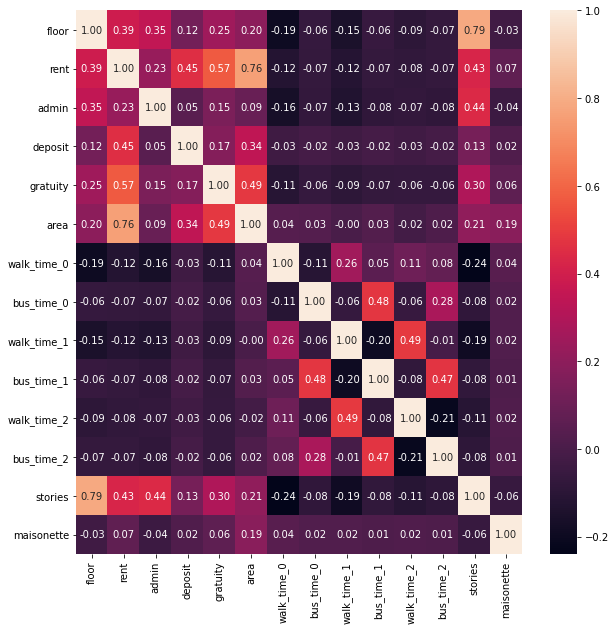

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_.corr(), annot=True, fmt='.2f')
plt.show()

In [18]:
df_path = data_dir / 'interim' / 'kanto_preprocessed.csv'
df_path.parent.mkdir(exist_ok=True)
df_.to_csv(df_path)